# Ferrario Gabriele 817518 Assignment 3 
____
### Roadmap:
- Data Loading and Preparation
- Model Definition
- Training
- Test Evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers

#### Data Loading and Preparation

In [2]:
# Model/data pramaters
num_classes= 10
input_shape= (28,28,1)

# load the data and divide it into train/test split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images into the [0 1] range
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# Make images with sie (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Model definition

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=(input_shape)),
        layers.Conv2D(8, kernel_size=(5, 5), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 5,994
Trainable params: 5,994
Non-trainable params: 0
______________________________________________________

#### Training

In [5]:
batch_size=16
epochs=15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
3375/3375 [==============================] - 46s 14ms/step - loss: 0.2486 - accuracy: 0.9259 - val_loss: 0.1071 - val_accuracy: 0.9723
Epoch 2/15
3375/3375 [==============================] - 53s 16ms/step - loss: 0.0979 - accuracy: 0.9702 - val_loss: 0.0719 - val_accuracy: 0.9795
Epoch 3/15
3375/3375 [==============================] - 44s 13ms/step - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0.0666 - val_accuracy: 0.9832
Epoch 4/15
3375/3375 [==============================] - 36s 11ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.0576 - val_accuracy: 0.9818
Epoch 5/15
3375/3375 [==============================] - 49s 14ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.0520 - val_accuracy: 0.9855
Epoch 6/15
3375/3375 [==============================] - 55s 16ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0431 - val_accuracy: 0.9883
Epoch 7/15
3375/3375 [==============================] - 51s 15ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0487 -

#### Test Evaluation

Evaluation of the model on the test set

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04164024442434311
Test accuracy: 0.9876000285148621


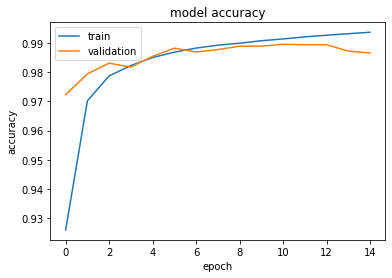

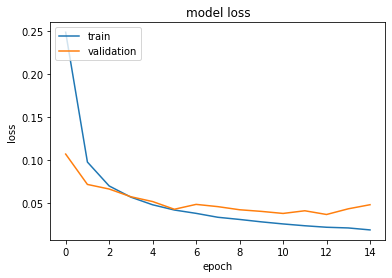

In [7]:
# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()